In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sarahvch/predicting-who-pays-back-loans")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/predicting-who-pays-back-loans


In [14]:
import os

print(os.listdir(path))

['LoanStats_2016Q4.csv', 'LoanStats_2016Q2.csv', 'loan_data.csv', 'LoanStats_2016Q3.csv', 'LoanStats_2016Q1.csv']


In [15]:
loans = pd.read_csv("/kaggle/input/predicting-who-pays-back-loans/loan_data.csv")
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [16]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [18]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### **Análise Exploratória de Dados (EDA)**

# Percebemos que o FICO dos mutuários com **Credit Policy** 1, é relativamente maior que o FICO dos mutuários com **Credit Policy** 0. Algo esperado, já que **Credit Policy** 0, significa que o mutuário não está atendendo os critérios de subscrição ao crédito, impactando negativamente na nota FICO.

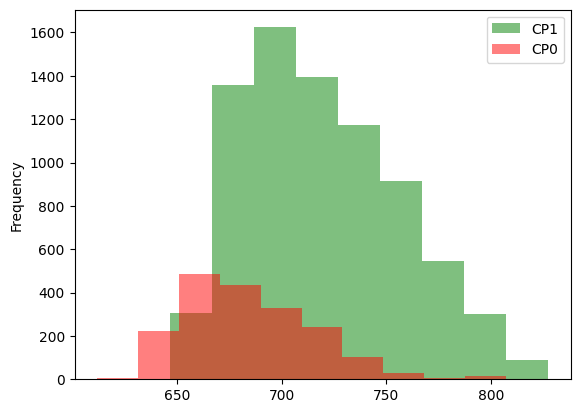

In [19]:
loans[loans['credit.policy'] == 1]['fico'].plot(kind='hist', alpha=0.5, color = 'green', label = 'CP1')
loans[loans['credit.policy'] == 0]['fico'].plot(kind='hist', alpha=0.5, color = 'red', label = 'CP0')

plt.legend()

# Notamos que quando o mutuário paga integralmente seus empréstimos, ele tende a ter uma **Credit Policy** 1, representando que ele atende aos critérios de subscrição de crédito.

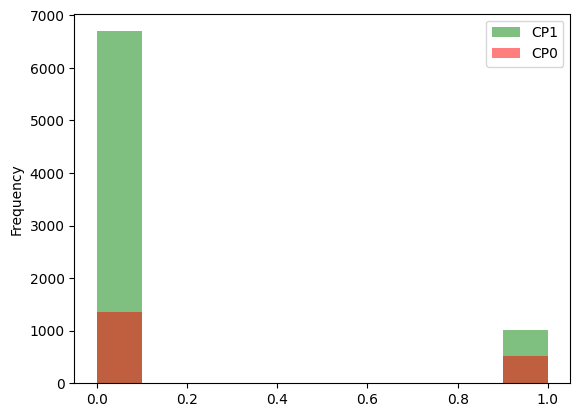

In [20]:
loans[loans['credit.policy'] == 1]['not.fully.paid'].plot(kind='hist', alpha=0.5, color = 'green', label = 'CP1')
loans[loans['credit.policy'] == 0]['not.fully.paid'].plot(kind='hist', alpha=0.5, color = 'red', label = 'CP0')

plt.legend()

<Axes: xlabel='purpose', ylabel='count'>

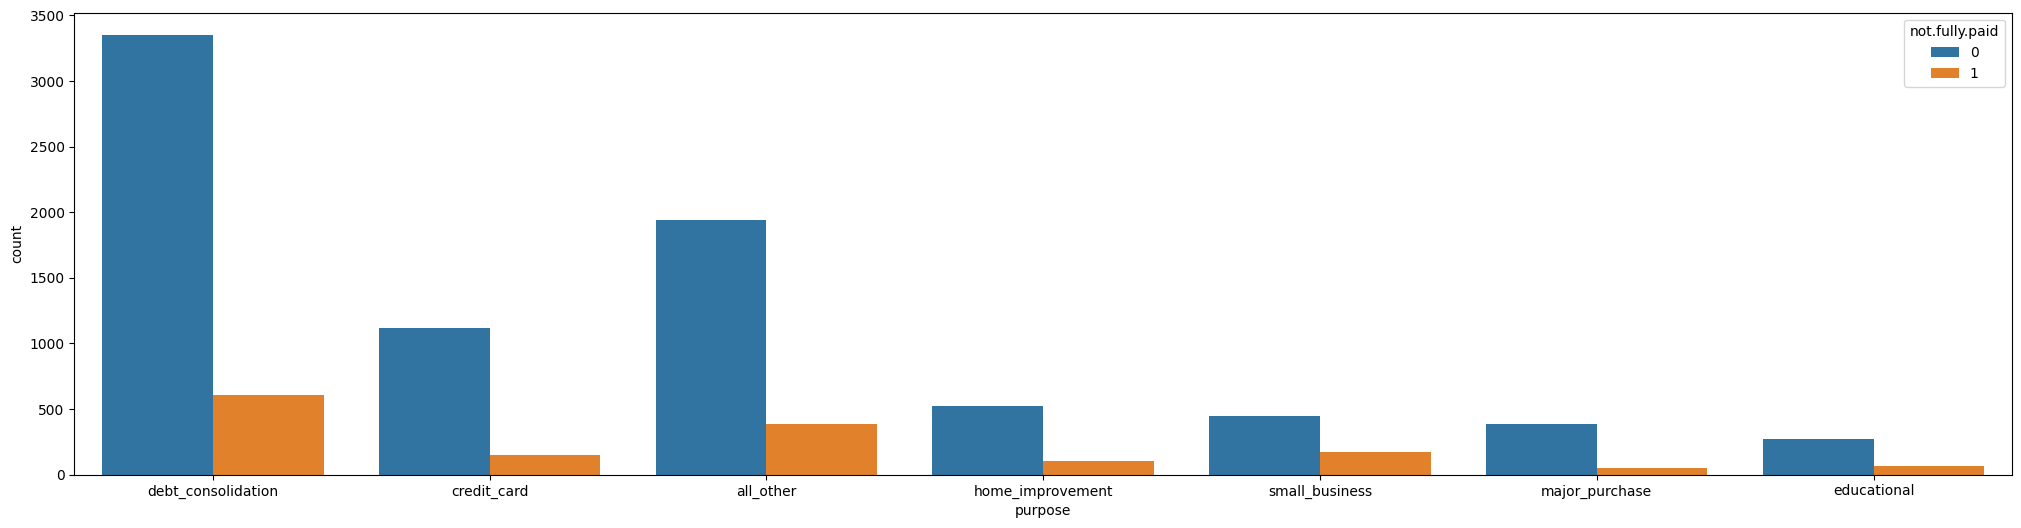

In [21]:
fig, ax = plt.subplots(figsize = (25,6))
sns.countplot(data = loans, x = 'purpose', hue = 'not.fully.paid')

In [22]:
loans['purpose'].value_counts()

,count
purpose,
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


In [23]:
loans['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


# Percebemos que quanto maior o **FICO**, menor é a taxa de juros do empréstimo, o que faz muito sentido, já que juros maiores ocorrem em mutuários mais arriscados, e mutuários com **FICO** alto, representam baixo risco de empréstimo, garantindo um juros expressivamente menor

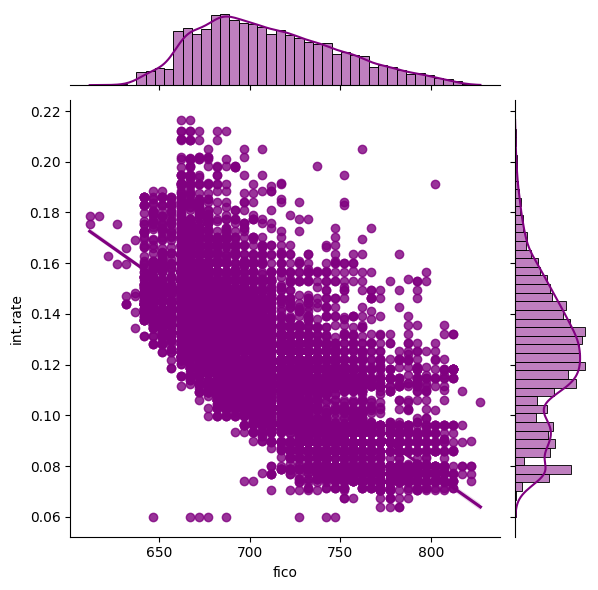

In [24]:
sns.jointplot(data = loans, x = 'fico', y = 'int.rate', color = 'purple', kind = 'reg')

<Figure size 1100x700 with 0 Axes>

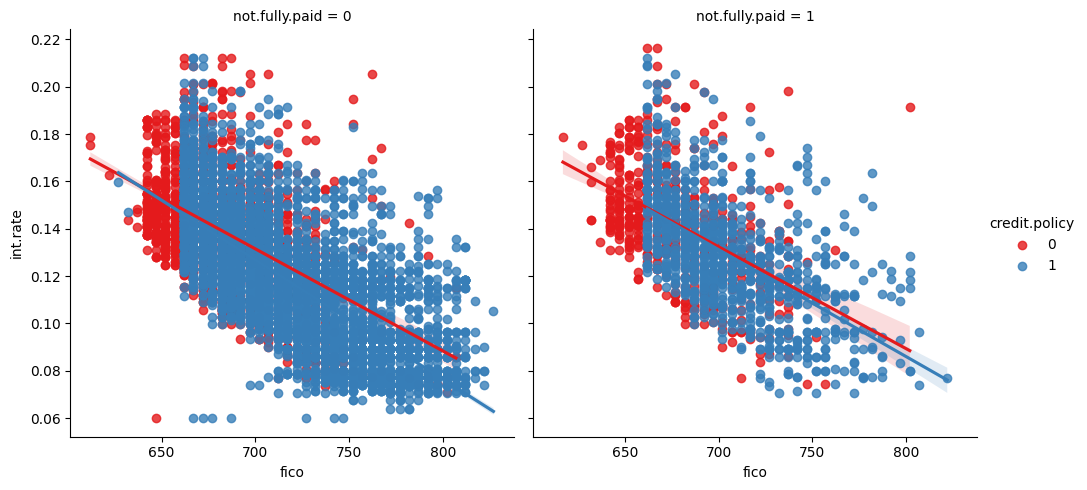

In [25]:
plt.figure(figsize=(11,7))

sns.lmplot(y = 'int.rate', x = 'fico', data = loans, hue='credit.policy', col = 'not.fully.paid', palette='Set1')

## **Configurando os Dados**

In [26]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Encodando a feature **Purpose**

In [27]:
df_final = pd.get_dummies(loans, columns = ['purpose'], drop_first=True)

In [28]:
df_final

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,False,False,False,False,False,False
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,False,True,False,False,False,False
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,False,False,False,True,False,False


## **Treinando e testando o Modelo**

In [29]:
from sklearn.model_selection import train_test_split

X = df_final.drop('not.fully.paid', axis=1)

y = df_final['not.fully.paid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dtree.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[1994  437]
 [ 343  100]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



## Utilizando Ensemble Learning para verificar se o modelo consegue ter uma acurácia melhor, principalmente aonde o mutuário não pagou integralmente o empréstimo

In [34]:
from sklearn.ensemble import RandomForestClassifier

rdf_clf = RandomForestClassifier(n_estimators = 200)

In [35]:
rdf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [36]:
rdf_y_pred = rdf_clf.predict(X_test)

## Podemos verificar que, mesmo utilizando Ensemble Learning, tivemos resultados substancialmente ruins em relação a classe 1 (Mutuários que não pagaram integralmente os empréstimos), o que é explicado em partes pelo forte desbalanceamento da classe (Muitos 0's e poucos 1's).

In [37]:
print(confusion_matrix(y_test, rdf_y_pred))

print(classification_report(y_test, rdf_y_pred))

[[2422    9]
 [ 431   12]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [38]:
df_final['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


## Trabalhando com as classes balanceadas

# Precisamos construir nossa própria validação cruzada, já que utilizando o **cross_val_score** do **SkLearn**, estaríamos passando nossos dados balanceados para serem validados, o que é errado, já que os dados a serem validados são os dados reais.

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def cross_val(modelo, X, y, oversampling=False):
  kfold = KFold(n_splits=10)
  acuracias_split = []

  for idx, (idx_treino, idx_validacao) in enumerate(kfold.split(X)):
    X_split_treino = X.iloc[idx_treino, :]
    y_split_treino = y.iloc[idx_treino]

    if oversampling:
      sm = SMOTE(random_state=42)
      X_split_treino, y_split_treino = sm.fit_resample(X_split_treino, y_split_treino)

    modelo.fit(X_split_treino, y_split_treino)

    X_split_validacao = X.iloc[idx_validacao, :]
    y_split_validacao = y.iloc[idx_validacao]

    val_pred = modelo.predict(X_split_validacao)
    acuracia_split = accuracy_score(y_split_validacao, val_pred)
    acuracias_split.append(acuracia_split)

    print(f'Acurácia do split {idx}: {acuracia_split}')
    print(classification_report(y_split_validacao, val_pred))

  return acuracias_split


In [40]:
from statistics import mean

media_acuracia_sem_smote = mean(cross_val(rdf_clf, X_train, y_train, oversampling = False))

Acurácia do split 0: 0.842026825633383
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       565
           1       0.50      0.01      0.02       106

    accuracy                           0.84       671
   macro avg       0.67      0.50      0.47       671
weighted avg       0.79      0.84      0.77       671

Acurácia do split 1: 0.8286140089418778
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       558
           1       0.25      0.01      0.02       113

    accuracy                           0.83       671
   macro avg       0.54      0.50      0.46       671
weighted avg       0.73      0.83      0.76       671

Acurácia do split 2: 0.8301043219076006
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       562
           1       0.14      0.01      0.02       109

    accuracy                           0.83       671
   macro 

In [41]:
media_acuracia_com_smote = mean(cross_val(rdf_clf, X_train, y_train, oversampling = True))

Acurácia do split 0: 0.7779433681073026
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       565
           1       0.25      0.21      0.23       106

    accuracy                           0.78       671
   macro avg       0.55      0.55      0.55       671
weighted avg       0.76      0.78      0.77       671

Acurácia do split 1: 0.7645305514157973
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       558
           1       0.24      0.19      0.21       113

    accuracy                           0.76       671
   macro avg       0.54      0.53      0.54       671
weighted avg       0.74      0.76      0.75       671

Acurácia do split 2: 0.7645305514157973
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       562
           1       0.24      0.20      0.22       109

    accuracy                           0.76       671
   macro

In [42]:
f'Sem smote: {media_acuracia_sem_smote:.02f}, com_smote: {media_acuracia_com_smote:.02f}'

'Sem smote: 0.84, com_smote: 0.78'

## Percebemos que, com as classes balanceadas, apesar da accuracy ter sido prejudicada, conseguimos um recall substancialmente maior e um f1-score também interessante. Portanto, decidimos continuar com o modelo balanceado